In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from textblob import Word
import nltk
from datetime import datetime
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.corpus import stopwords
from wordcloud import WordCloud

In [2]:
pwd

'C:\\Users\\ajdou\\Desktop\\Springboard\\assignments\\Capstone Project 2'

In [3]:
#load in dataset
df = pd.read_csv('data\\added_features.csv', index_col = 0)

In [4]:
df.head()

,title,text,label,text_wc,title_wc,av_word_len_text,av_word_len_title,upper_text_wc,upper_title_wc,numerics_text,numerics_title,exclam_text,exclam_title,qmark_text,qmark_title,at_sign,stop_p,weekend,Sep_Dec
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,1,495,12,4.804040,5.583333,5,0,4,0,6,0,9,0,13,0.375758,1,1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,1,305,8,5.213115,7.625000,3,0,0,0,0,0,0,0,0,0.390164,1,1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",1,580,15,5.168966,5.000000,42,0,0,0,2,0,4,0,14,0.360345,1,1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",1,444,14,5.180180,4.571429,5,1,5,0,0,0,1,0,8,0.360360,0,1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,1,420,11,4.554762,5.363636,0,0,0,0,0,0,0,0,0,0.464286,0,1


In [6]:
#make all words lowercase
df['text'] = df.text.str.lower()
df['title'] = df.title.str.lower()

In [7]:
#remove all punctuation
df['title'] = df.title.str.replace('[^\w\s]', '')
df['text'] = df.text.str.replace('[^\w\s]', '')

In [8]:
#remove numerics
df['title'] = df.title.str.replace('[0-9]', '')

In [9]:
#remove stopwords
stop = stopwords.words('english')
df['title'] = df.title.apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df['text'] = df.text.apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [10]:
#lemmatization
df['text'] = df.text.apply(lambda x: " ".join(Word(word).lemmatize() for word in x.split()))
df['title'] = df.title.apply(lambda x: " ".join(Word(word).lemmatize() for word in x.split()))

In [96]:
#tokenization
cv = CountVectorizer(max_features=100)
title_counts = cv.fit_transform(df.title).toarray()

In [97]:
feature_names = cv.get_feature_names()
title_counts_df = pd.DataFrame(title_counts, columns=feature_names).add_prefix('title_cv_')

In [98]:
title_counts_df.sum().sort_values(ascending=False)

title_cv_trump      12740
title_cv_video       6352
title_cv_say         3759
title_cv_house       1855
title_cv_obama       1842
                    ...  
title_cv_factbox      416
title_cv_would        411
title_cv_brexit       410
title_cv_gun          404
title_cv_day          400
Length: 100, dtype: int64

In [93]:
cv = CountVectorizer(max_features=100)
cv.fit_transform(df.text)
text_counts = cv.fit_transform(df.text).toarray()
feature_names = cv.get_feature_names()
text_counts_df = pd.DataFrame(text_counts, columns=feature_names).add_prefix('text_cv_')

In [94]:
text_counts_df.sum().sort_values(ascending=False)

text_cv_said         120692
text_cv_trump        117296
text_cv_state         51830
text_cv_would         49295
text_cv_president     46260
                      ...  
text_cv_plan          10013
text_cv_go             9972
text_cv_saying         9957
text_cv_world          9946
text_cv_public         9924
Length: 100, dtype: int64

In [129]:
#prevent data leakage
df.title = df.title.str.replace('reuters', '')
df.text = df.text.str.replace('reuters', '')

In [182]:
title_string = " ".join(row for row in df.title)
text_string = " ".join(row for row in df.text)
fake_title_string = " ".join(row for row in df[df.label == 1].title)
true_title_string = " ".join(row for row in df[df.label==0].title)
fake_text_string= " ".join(row for row in df[df.label==1].text)
true_text_string= " ".join(row for row in df[df.label==0].text)
string_dict = {'fake_title': fake_title_string, 'true_title': true_title_string, 'fake_text':fake_text_string, 'true_text':true_text_string}

In [179]:
def make_word_cloud(string):
    wordcloud = WordCloud(width = 800, height = 800, background_color ='white', min_font_size = 10)
    cloud = wordcloud.generate(string) 
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(cloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 

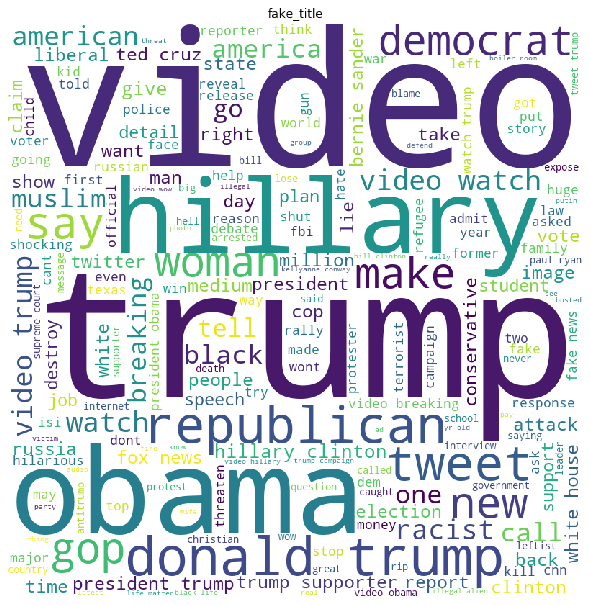

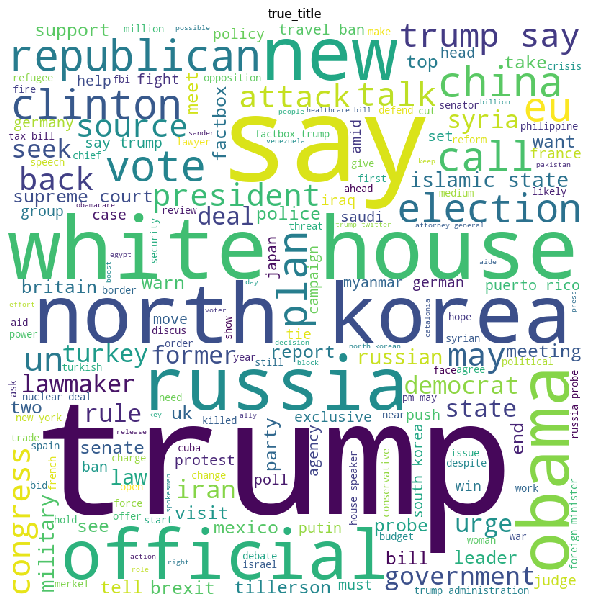

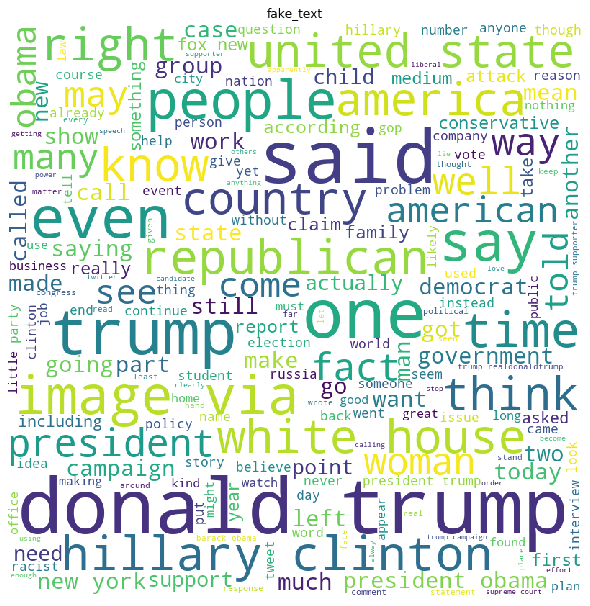

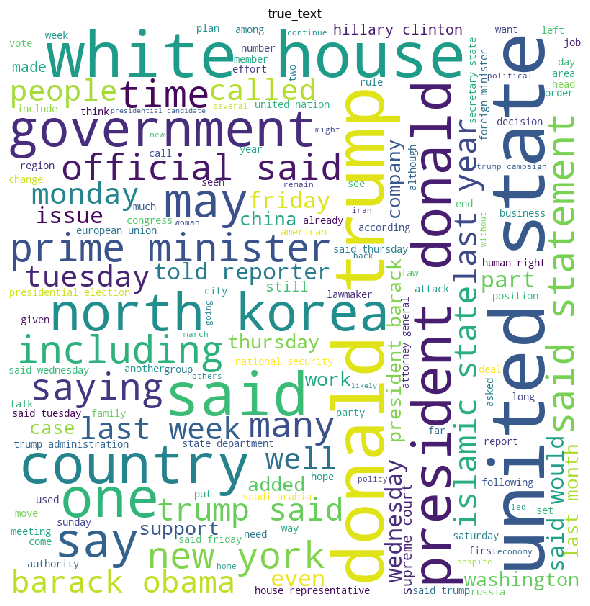

In [184]:
for name, string in string_dict.items():
    make_word_cloud(string)
    plt.title(name)

In [207]:
tfidf= TfidfVectorizer(ngram_range=(1,2), max_features=800)
text_n_gram = tfidf.fit_transform(df['text']).toarray()
feature_names = tfidf.get_feature_names()
text_n_gram_df = pd.DataFrame(text_n_gram, columns= feature_names).add_prefix('text_ngram_')

In [208]:
text_n_gram_df.sum().sort_values(ascending=False)

text_ngram_trump         3578.822655
text_ngram_said          2883.829607
text_ngram_state         1536.651348
text_ngram_president     1488.967370
text_ngram_would         1397.103537
                            ...     
text_ngram_investment     150.827407
text_ngram_example        150.564098
text_ngram_raised         149.260981
text_ngram_benefit        147.323141
text_ngram_dont           143.564522
Length: 800, dtype: float64

In [209]:
tfidf= TfidfVectorizer(ngram_range=(1,2), max_features=200)
title_n_gram = tfidf.fit_transform(df['title']).toarray()
feature_names = tfidf.get_feature_names()
title_n_gram_df = pd.DataFrame(title_n_gram, columns= feature_names).add_prefix('title_ngram_')

In [216]:
title_n_gram_df.sum().sort_values(ascending=False)

title_ngram_trump              3844.327359
title_ngram_video              2391.098721
title_ngram_say                1526.216485
title_ngram_obama               876.433422
title_ngram_republican          844.789792
                                  ...     
title_ngram_britain             160.910592
title_ngram_trump supporter     158.111306
title_ngram_next                154.303880
title_ngram_bernie              153.366726
title_ngram_fox news            142.241794
Length: 200, dtype: float64

In [210]:
model_df = pd.concat([df.drop(['text', 'title'], axis=1), title_n_gram_df, text_n_gram_df], axis=1)

In [211]:
model_df

,label,text_wc,title_wc,av_word_len_text,av_word_len_title,upper_text_wc,upper_title_wc,numerics_text,numerics_title,exclam_text,...,text_ngram_worker,text_ngram_working,text_ngram_world,text_ngram_would,text_ngram_wrong,text_ngram_wrote,text_ngram_year,text_ngram_yet,text_ngram_york,text_ngram_young
0,1,495,12,4.804040,5.583333,5,0,4,0,6,...,0.0,0.000000,0.000000,0.042373,0.05155,0.0,0.397089,0.00000,0.000000,0.000000
1,1,305,8,5.213115,7.625000,3,0,0,0,0,...,0.0,0.000000,0.076001,0.000000,0.00000,0.0,0.000000,0.00000,0.174927,0.000000
2,1,580,15,5.168966,5.000000,42,0,0,0,2,...,0.0,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.00000,0.000000,0.000000
3,1,444,14,5.180180,4.571429,5,1,5,0,0,...,0.0,0.058438,0.000000,0.087211,0.00000,0.0,0.034053,0.00000,0.000000,0.000000
4,1,420,11,4.554762,5.363636,0,0,0,0,0,...,0.0,0.000000,0.065643,0.000000,0.00000,0.0,0.000000,0.07669,0.000000,0.092753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39099,0,463,9,5.008639,5.888889,14,2,3,0,0,...,0.0,0.000000,0.000000,0.109716,0.00000,0.0,0.085681,0.00000,0.000000,0.000000
39100,0,122,7,5.336066,6.571429,0,0,0,0,0,...,0.0,0.000000,0.000000,0.000000,0.00000,0.0,0.143642,0.00000,0.000000,0.000000
39101,0,317,7,5.044164,6.142857,4,0,3,0,0,...,0.0,0.000000,0.000000,0.000000,0.00000,0.0,0.198413,0.00000,0.000000,0.000000
39102,0,202,9,4.806931,5.888889,0,0,0,0,0,...,0.0,0.000000,0.182365,0.000000,0.00000,0.0,0.063190,0.00000,0.000000,0.000000


In [212]:
X = model_df.drop('label', axis=1)
y = model_df.label

In [213]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [214]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=.25, random_state= 42)

In [215]:
model_df.to_csv('data\model_df.csv')